## Data Analysis Exam 
## Teagan Kilian 

In [302]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D


In [303]:
# import data 
data1 = pd.read_csv('exoplanets.csv')
s = np.size(data1)
description = data1.describe()
print(description)

data = data1.to_numpy() 

p_mass = np.array(data[:,0])  # choose the first attribute
p_mass = p_mass.reshape((-1,1)) # reshape the data into one column
v_p_mass = np.var(p_mass) # calculate the variance of the data 

p_radius = np.array(data[:,1])
p_radius = p_radius.reshape((-1,1))

o_period = np.array(data[:,2])
o_period = o_period.reshape((-1,1))

o_radius = np.array(data[:,3])
o_radius = o_radius.reshape((-1,1))

s_mass = np.array(data[:,4])
s_mass = s_mass.reshape((-1,1))

s_radius = np.array(data[:,5])
s_radius = s_radius.reshape((-1,1))

s_temp = np.array(data[:,6])
s_temp = s_temp.reshape((-1,1))

s_lum = np.array(data[:,7])
s_lum = s_lum.reshape((-1,1))



       planet_mass  planet_radius  orbital_period  orbital_radius   star_mass  \
count   973.000000     973.000000      973.000000      973.000000  973.000000   
mean    320.506067       9.044680       17.312265        0.098736    0.993663   
std     654.437486       5.608198       54.234411        0.146758    0.252746   
min       0.889840       0.891296        0.719573        0.015260    0.339000   
25%      11.123000       2.856000        3.101290        0.041300    0.838000   
50%     129.980200      10.696000        4.569673        0.054900    1.000000   
75%     346.402000      13.630400       10.994750        0.095400    1.170000   
max    8653.694000      20.888000      748.300000        1.660000    1.630000   

       star_radius  star_temperature  star_luminosity  
count   973.000000        973.000000       973.000000  
mean      1.119752       5449.693649         3.212703  
std       0.460320        774.248309         1.064207  
min       0.344000       3386.000000         0

The dataset contains 8 variables that each have 973 entries. The mean, standard deviation, percentiles, and extrema are outlined in the description of the dataset. There are no missing values. 
Regarding the standard deviation of each feature, there is a wide range of values such as the star temperature and planet mass having quite high values and the orbital radius, star mass, and star radius having quite low values. These values represent the spread of the data from the mean. If the feature has a low standard deviation, it means that most of its values are found close to the mean. The opposite is true for features with a high standard deviation. One explanation for why planet mass has such a high standard deviation is because there are generally two categories of planets: gaseous planets with lower densities and masses and rocky planets with higher densities and masses. For this reason, it is likely that there is a wide range of planet masses from the gaseous ones to the rocky ones with the mean obviously in the middle and a large range of values spread out on either side. 
The star mass has a much smaller standard deviation likely because there aren't as many options of star composition compared to planets. Therefore,  most star values will be clustered closer to the mean. Because of this, it is likely that stars will have a stronger relationship between mass and radius than planets will. 

<Figure size 640x480 with 0 Axes>

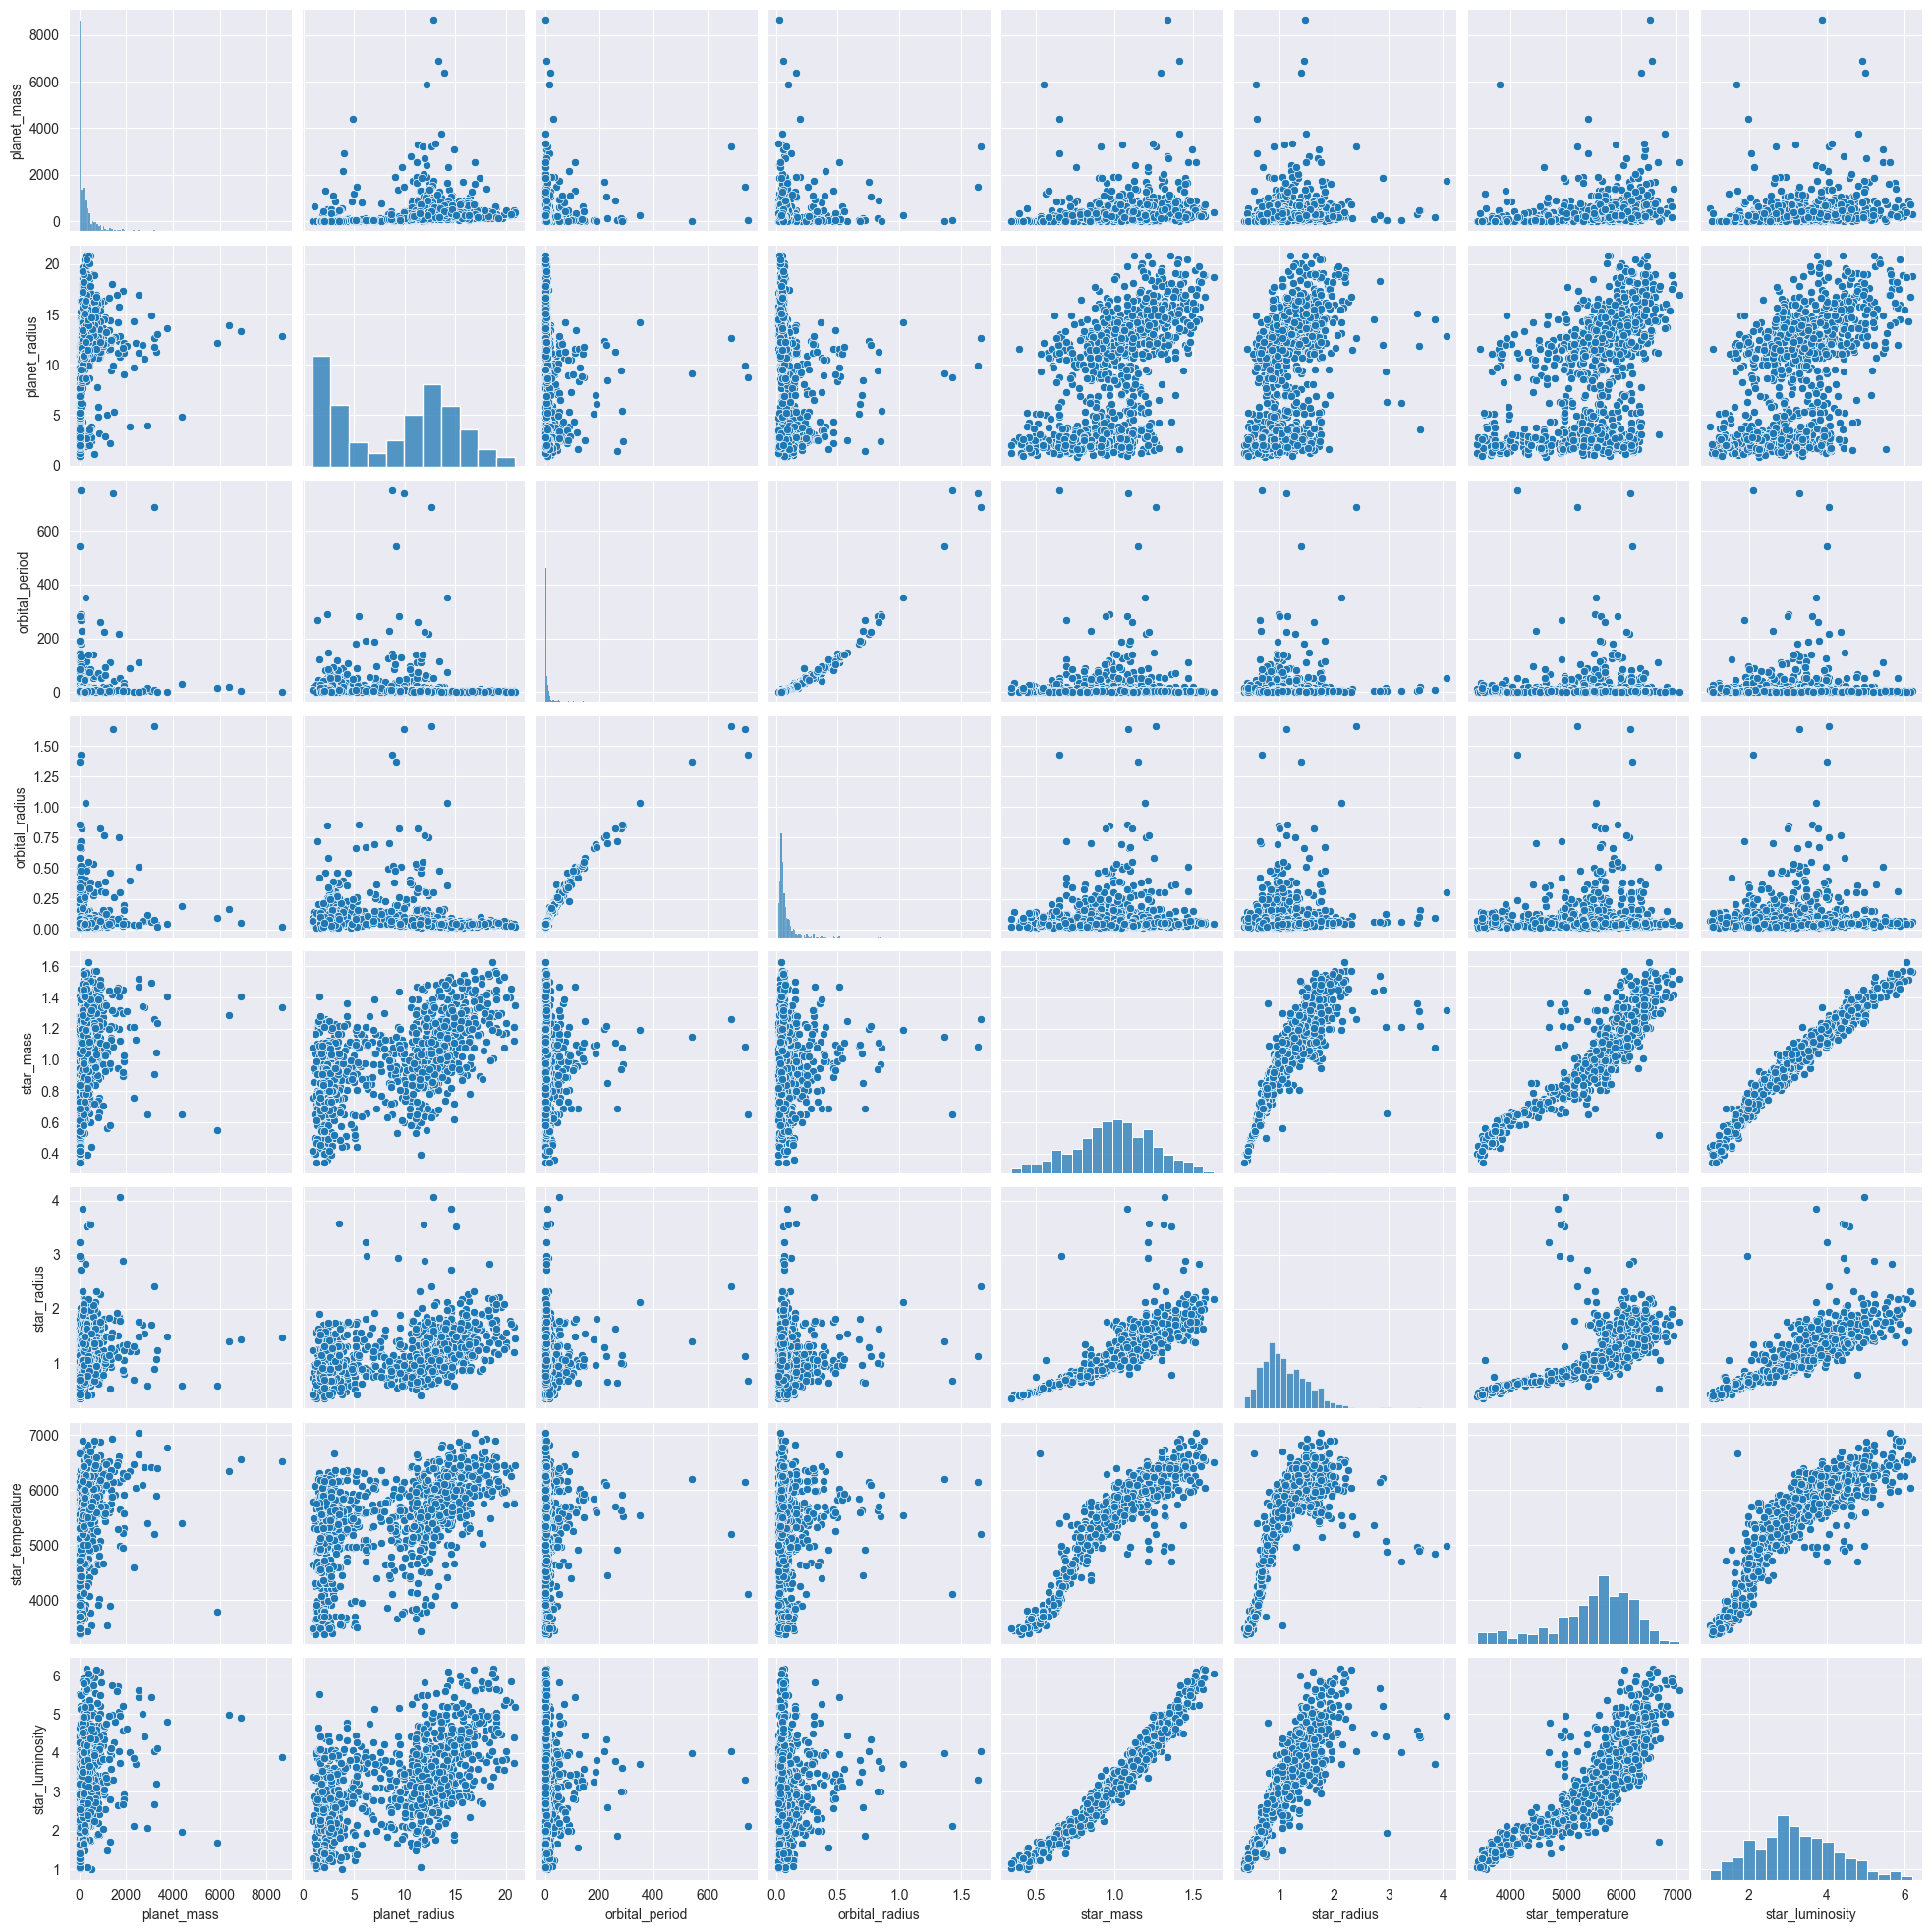

In [304]:
# Dataset analysis 

plt.figure(1)
sns.pairplot(data1)


<Axes: >

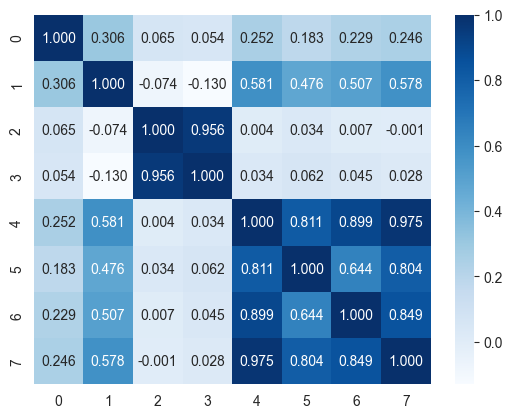

In [305]:
corcoeff = np.corrcoef(data, rowvar = False)
sns.heatmap(corcoeff, annot = True, fmt = ".3f", cmap = "Blues")

The mass of the stars relative to the suns mass and the luminosity of the stars relative to the suns luminosity are heavily correlated. Further, they are seen to have a strong, positive linear relationship this could be further seen by performing a linear regression and observing the rms error between the data points and the actual line. Orbital radius and orbital period also have a very strong linear relationship. Star temperature has a strong correlation with star luminosity as well. 

Unsurprisingly, the radius of the planets have no correlation to the stars mass, radius, temperature, and luminosity. This can be seen by virtually no organization on the pair plots for these variables. It is rather intuitive that the sun in a solar system has little to do with the various physical attributes of planets. This can be seen in our solar system because although there is only one sun, there are 9 highly unique planets that revolve around it. 

Additionally, the relationships between the features seen in the pairplots directly correlate to the cells in the heatmap. The heatmap provides the correlation coefficient between two features which verifies the previous analysis. The two features that have a stronger relationship (as seen in the pairplot) have a higher value of correlation coefficient in the heatmap. For example, the mass and luminosity of a star have a strong relationship because their data points are clustered closely around a line with a positive slope. These features (which correspond to features 4 and 7, respectively) have a correlation coefficient of 0.975 given by the heatmap. 


### Relationship Analysis Between Star Radius and Star Mass

R test linear model = 0.658
R test for multiple linear model = -0.905


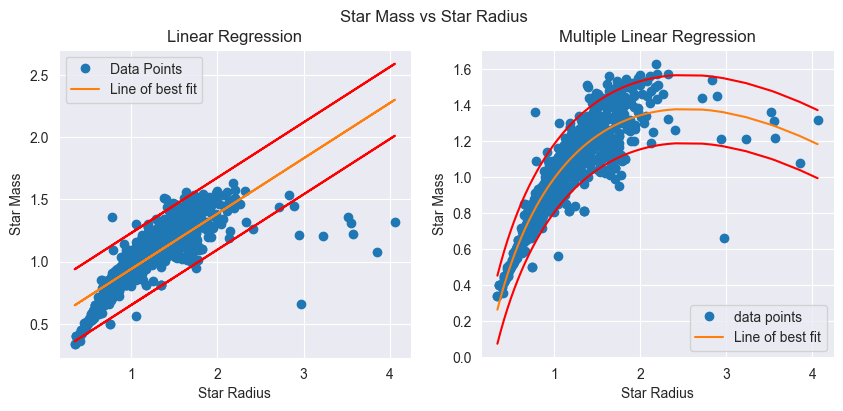

In [306]:
# Linear Regression
reg = LinearRegression()
reg.fit(s_radius, s_mass)
predict = reg.predict(s_radius)

print('R test linear model = ' + str(round(reg.score(s_radius, s_mass), 3)))

# calculate the standard deviation 
err = np.sum((s_mass - predict)**2)
stdev = np.sqrt(1/(len(s_mass)-2) * err)
interval = 1.96 * stdev
lower, upper = predict - interval, predict + interval


plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.plot(s_radius, s_mass, 'o', label = 'Data Points')
plt.xlabel('Star Radius')
plt.ylabel('Star Mass')
plt.plot(s_radius, predict, '-', label = 'Line of best fit')
plt.plot(s_radius, lower, '-r')
plt.plot(s_radius, upper, '-r')
plt.title('Linear Regression')
plt.legend()


# Multiple Linear Regression 

x = np.hstack([np.asarray(s_radius).reshape(-1, 1),np.asarray(np.sqrt(s_radius)).reshape(-1, 1)])
s_mass_fit = np.asarray(s_mass).reshape(-1, 1)

model = LinearRegression()
model.fit(x, s_mass_fit)
predict = model.predict(x)

x_fit = np.asarray(s_radius).reshape(-1, 1)
ara = np.hstack([x_fit,s_mass_fit,predict])
sorted_array = ara[np.argsort(ara[:, 0])]
x_fit,s_mass_fit,predict = np.hsplit(sorted_array,3)

err = np.sum((s_mass_fit - predict)**2)
stdev = np.sqrt(1/(len(s_mass_fit)-2) * err)
interval = 1.96 * stdev
lower, upper = predict - interval, predict + interval
print('R test for multiple linear model = ' + str(round(model.score(x, s_mass_fit), 3)))

plt.subplot(1,2,2)
plt.plot(s_radius, s_mass, 'o', label='data points')
plt.xlabel('Star Radius')
plt.ylabel('Star Mass')
plt.plot(x_fit, predict, '-', label='Line of best fit')
plt.plot(x_fit, lower, '-r')
plt.plot(x_fit, upper, '-r')
plt.title('Multiple Linear Regression')
plt.legend()

plt.suptitle('Star Mass vs Star Radius')
plt.show()


The R value is only 0.66 for the linear model between star mass and star radius. This can be expected because when looking at the plot with the line of best fit, the data does not seem to follow the line very closely and there are many outliers. For this reason it is necessary to try another type of fit that can better describe the relationship between star mass and star radius. 
The multiple linear regression method worked much better in terms of describing the data because this method provided an R value of -0.9. This suggests a very strong relationship to this model. Due to outliers having very low densities (large radii and small masses) the relationship between the mass and radius of a star is complicated and will likely not be able to be described by one function.

### Relationship Analysis Between Star Luminosity and Star Mass


R test linear model = 0.951
R test for multiple linear model = -0.912


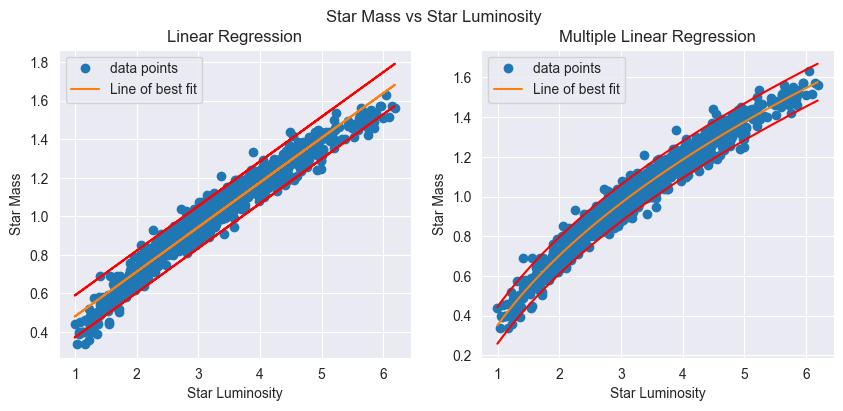

In [307]:
# Linear Regression
reg = LinearRegression()
reg.fit(s_lum, s_mass)
predict = reg.predict(s_lum)

print('R test linear model = ' + str(round(reg.score(s_lum, s_mass), 3)))
      
# calculate the standard deviation 
err = np.sum((s_mass - predict)**2)
stdev = np.sqrt(1/(len(s_mass)-2) * err)
interval = 1.96 * stdev
lower, upper = predict - interval, predict + interval

plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.plot(s_lum, s_mass, 'o', label = 'data points')
plt.xlabel('Star Luminosity')
plt.ylabel('Star Mass')
plt.plot(s_lum, predict, '-', label = 'Line of best fit')
plt.plot(s_lum, lower, '-r')
plt.plot(s_lum, upper, '-r')
plt.title('Linear Regression')
plt.legend()


# Multiple Linear Regression 

x = np.hstack([np.asarray(s_lum).reshape(-1, 1),np.asarray(np.sqrt(s_lum)).reshape(-1, 1)])
s_mass_fit = np.asarray(s_mass).reshape(-1, 1)

model = LinearRegression()
model.fit(x, s_mass_fit)
predict = model.predict(x)

x_fit = np.asarray(s_lum).reshape(-1, 1)
ara = np.hstack([x_fit,s_mass_fit,predict])
sorted_array = ara[np.argsort(ara[:, 0])]
x_fit,s_mass_fit,predict = np.hsplit(sorted_array,3)

err = np.sum((s_mass_fit - predict)**2)
stdev = np.sqrt(1/(len(s_mass_fit)-2) * err)
interval = 1.96 * stdev
lower, upper = predict - interval, predict + interval
print('R test for multiple linear model = ' + str(round(model.score(x, s_mass_fit), 3)))

plt.subplot(1,2,2)
plt.plot(s_lum, s_mass, 'o', label='data points')
plt.xlabel('Star Luminosity')
plt.ylabel('Star Mass')
plt.plot(x_fit, predict, '-', label='Line of best fit')
plt.plot(x_fit, lower, '-r')
plt.plot(x_fit, upper, '-r')
plt.title('Multiple Linear Regression')
plt.legend()

plt.suptitle('Star Mass vs Star Luminosity')
plt.show()


As seen in the figure, the data points follow the line of best fit for the linear regression very well. This suggests that the luminosity of a star can help to predict what the mass of the star will be with some confidence. an R value of about 0.95 demonstrates a strong linear relationship between the star luminosity and the star mass using this model. 
In this case, the linear fit was actually a better choice compared to the multiple linear regression although both models fit the data quite well. This suggests that the star mass and star luminosity have strong, positive linear relationship. 

### Relationship Analysis Between Star Temperature and Star Mass

R test linear model = 0.809
R test for multiple linear model = -0.871


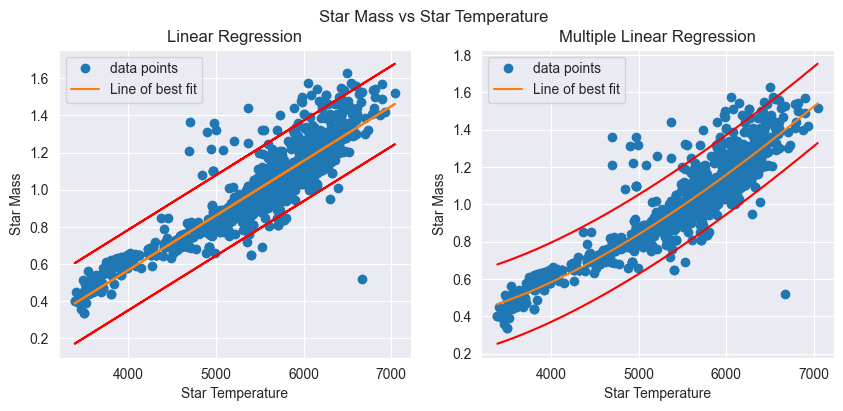

In [308]:
# Linear Regression
reg = LinearRegression()
reg.fit(s_temp, s_mass)
predict = reg.predict(s_temp) 

print('R test linear model = ' + str(round(reg.score(s_temp, s_mass), 3)))

# calculate the standard deviation 
err = np.sum((s_mass - predict)**2) # error between data and line
stdev = np.sqrt(1/(len(s_mass)-2) * err)
interval = 1.96 * stdev
lower, upper = predict - interval, predict + interval

plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.plot(s_temp, s_mass, 'o', label = 'data points')
plt.xlabel('Star Temperature')
plt.ylabel('Star Mass')
plt.plot(s_temp, predict, '-', label = 'Line of best fit')
plt.plot(s_temp, lower, '-r')
plt.plot(s_temp, upper, '-r')
plt.title('Linear Regression')
plt.legend()

# Multiple Linear Regression

x = np.hstack([np.asarray(s_temp).reshape(-1, 1),np.asarray(np.sqrt(s_temp)).reshape(-1, 1)])
s_mass_fit = np.asarray(s_mass).reshape(-1, 1)

model = LinearRegression()
model.fit(x, s_mass_fit)
predict = model.predict(x)

x_fit = np.asarray(s_temp).reshape(-1, 1)
ara = np.hstack([x_fit,s_mass_fit,predict])
sorted_array = ara[np.argsort(ara[:, 0])]
x_fit,s_mass_fit,predict = np.hsplit(sorted_array,3)

err = np.sum((s_mass_fit - predict)**2) # error between data and line 
stdev = np.sqrt(1/(len(s_mass_fit)-2) * err) # standard deviation
interval = 1.96 * stdev # 2 standard deviations
lower, upper = predict - interval, predict + interval 

print('R test for multiple linear model = ' + str(round(model.score(x, s_mass_fit), 3)))

plt.subplot(1,2,2)
plt.plot(s_temp, s_mass, 'o', label='data points')
plt.xlabel('Star Temperature')
plt.ylabel('Star Mass')
plt.plot(x_fit, predict, '-', label='Line of best fit')
plt.plot(x_fit, lower, '-r')
plt.plot(x_fit, upper, '-r')
plt.title('Multiple Linear Regression')
plt.legend()

plt.suptitle('Star Mass vs Star Temperature')
plt.show()
plt.show()


Both the linear and multiple linear regression models are able to describe the data quite well as they both have R values above 0.8. The multiple linear regression model was able to describe the data slightly better because the relationship between the stars mass and temperature is not strictly linear. 

### PCA between the sun attributes: s_radius, s_temp, s_lum


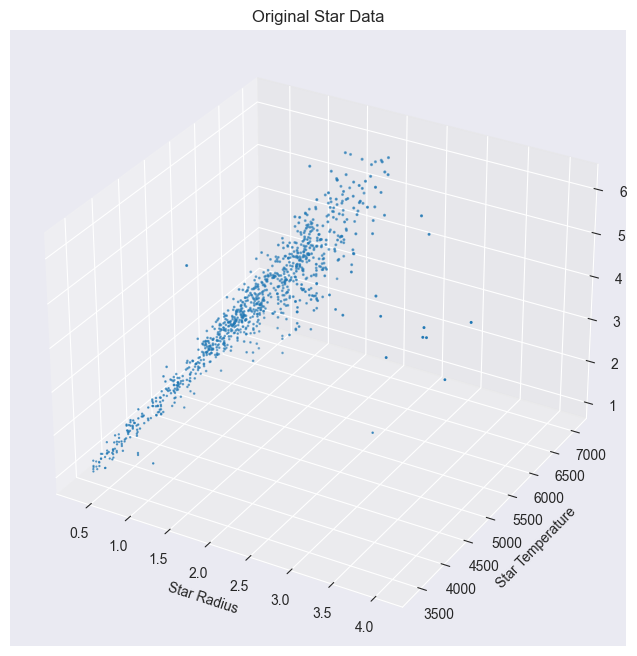

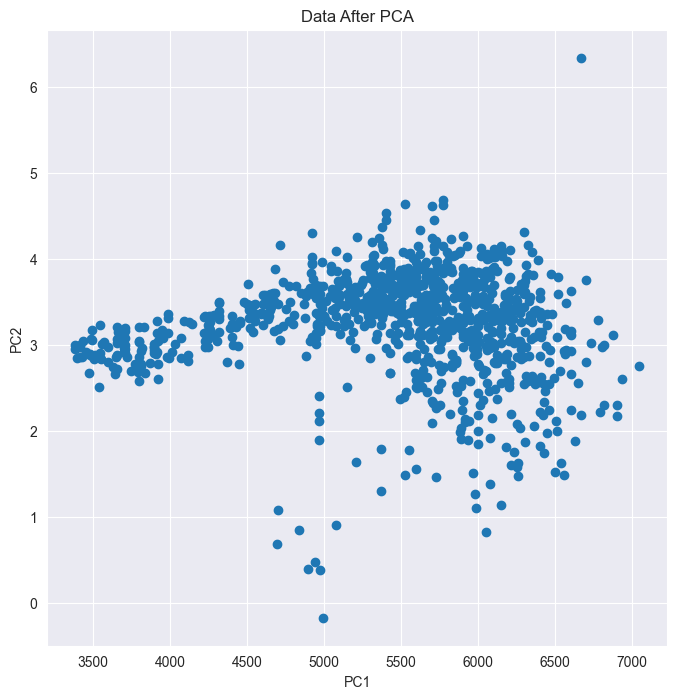

The number of principal components is 3. Since the number of principal components is equal to the number of attributes in the original data, all attributes are needed to accurately describe the data.


In [309]:
# put all attributes into a matrix 
sizes = s_mass
df = np.matrix([s_radius.flatten(), s_temp.flatten(), s_lum.flatten()]).T

# plot the initial data
fig = plt.figure(1, figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(s_radius, s_temp, s_lum,s = sizes)

ax.set_xlabel('Star Radius')
ax.set_ylabel('Star Temperature')
ax.set_zlabel('Star Luminosity')
ax.set_title('Original Star Data')
plt.show()

# calculate the mean of each attribute 
mean_radius = np.sum(s_radius)/len(s_radius)
mean_temp = np.sum(s_temp)/len(s_temp)
mean_lum = np.sum(s_lum)/len(s_lum)


# create zero mean points and ensure each attribute is 1D
s_radius_zero = np.array(s_radius - mean_radius).flatten()
s_temp_zero = np.array(s_temp - mean_temp).flatten()
s_lum_zero = np.array(s_lum - mean_lum).flatten()

# put all zero mean attributes into a single matrix 
df_zero = np.array([s_radius_zero, s_temp_zero, s_lum_zero]).T

# create covariance matrix from the zero mean attribute matrix 
cov_mat = np.cov(df_zero, rowvar = False)

# calculate the eigenvalues and eigenvectors
eigen = np.linalg.eig(cov_mat)
eigenvalues = eigen[0]
eigenvectors = eigen[1]

# choose the largest eigenvalue and the associated eigenvector to preserve the most of the datas variance 
max_eigenvalues = np.argsort(eigenvalues)[::-1]
max_eigenvectors = eigenvectors[:, max_eigenvalues[:3]]

# normalize the eigenvector so it has a length of one (it's a unit vector)
norm = np.linalg.norm(max_eigenvectors, axis=0)
eigenvector_norm = max_eigenvectors/ norm


# calculate the new points by applying the normalized eigenvector as a transformation to the original points
points = df @ eigenvector_norm 

# plot the data after PCA
plt.figure(2, figsize = (8,8))
plt.plot(points[:,0], points[:,1], 'o')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Data After PCA')

plt.show()

print(f'The number of principal components is {len(max_eigenvectors)}. Since the number of principal components is equal to the number of attributes in the original data, all attributes are needed to accurately describe the data.')

However, it is possible to project the data onto only the firs two principal components so it can be visualized in 2D while still preserving most of the variance. 

### Planet Habitability

In [310]:
# calculate the habitability

hz = np.array([0.8*(s_lum)**.5, 2 *(s_lum)**.5])

in_hz = 0
for i in range(len(o_radius)):
    if hz[0][i] <= o_radius[i] <= hz[1][i]:
        in_hz += 1 
    else:
        pass
print(f'The number of planets in the hospitable zone is {in_hz}')

# percentage of planets in the hz in this dataset
hz_per = in_hz / len(o_radius)

# calculate the potential number of hospitable planets in the universe

num_planets = 100e9 # estimated number of planets 
num_hz = num_planets * hz_per
print(f'An estimate of the number of planets in the galaxy within the hospitable zone is {round(num_hz)} if there are {num_planets} in the galaxy')

The number of planets in the hospitable zone is 3
An estimate of the number of planets in the galaxy within the hospitable zone is 308324769 if there are 100000000000.0 in the galaxy
